---
### **Notebook Introduction**

Welcome to this notebook! In this project, we will develop and evaluate machine learning models to predict **risk labels** based on engineered features such as the RFMS score and other relevant variables. The focus is on creating a robust pipeline for model training, hyperparameter tuning, and evaluation.  

#### **Objectives**:  
1. **Data Preparation**:  
   - Load the dataset and preprocess the data by removing highly correlated or redundant features.  
   - Split the dataset into training and testing sets for model development.  

2. **Model Training**:  
   - Train multiple machine learning models, including Logistic Regression, Decision Trees, Random Forest, and Gradient Boosting.  
   - Evaluate initial model performance to identify strong candidates for optimization.  

3. **Hyperparameter Tuning**:  
   - Use GridSearchCV to fine-tune hyperparameters for the selected models, focusing on maximizing the ROC-AUC score.  

4. **Model Evaluation**:  
   - Evaluate the best-performing models on the test dataset using metrics like accuracy, precision, recall, F1 score, and ROC-AUC.  
   - Compare models and analyze their strengths and weaknesses.  

5. **Visualization**:  
   - Plot ROC curves to visualize model performance and assess predictive power.  

This notebook is designed to follow a systematic approach, leveraging the functionality encapsulated in the `ModelTrainer` class. The goal is to ensure reproducibility, enhance model reliability, and provide actionable insights.

### **Step 1: Import Required Libraries**
Ensure that all the necessary libraries are installed and imported.

In [1]:
import sys
import os
sys.path.append(os.path.join(os.path.abspath('..')))

In [ ]:
import pandas as pd
import numpy as np
from src.modeling import ModelTrainer
import logging
import warnings

warnings.filterwarnings('ignore')

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

### **Step 2: Initialize the `ModelTrainer` Class**
Create an instance of the `ModelTrainer` class.

In [3]:
# Initialize the models
trainer = ModelTrainer()

### **Step 3: Load the Dataset**
Use the `load_data` method to load the dataset.

In [4]:
# Load the data
data_path = '../data/processed/default_estimated_data.csv'
target_col = "Risk_Label"   # target variable
highly_correlated = ["Recency", "Frequency", "Monetary", "Sociality", "RFMS_Score"]  # Exclude this column if it is highly correlated or derived from the target

# Split the data into features and target
X, y = trainer.load_data(data_path, target_col, highly_correlated)

2024-11-23 22:44:21,345 - INFO - Loading data from CSV file.
2024-11-23 22:44:22,325 - INFO - Columns in the data: ['CustomerId', 'Amount', 'PricingStrategy', 'TransactionStartTime_Month', 'TransactionStartTime_Day', 'TransactionStartTime_Dayofweek', 'TransactionStartTime_Hour', 'TransactionStartTime_Minute', 'TransactionStartTime_Elapsed', 'ProviderId_3', 'ProviderId_4', 'ProviderId_5', 'ProviderId_6', 'ProductId_4', 'ProductId_6', 'ProductId_9', 'ProductId_10', 'ProductId_13', 'ProductId_15', 'ProductId_20', 'ProductId_24', 'ProductCategory_airtime', 'ProductCategory_financial_services', 'ProductCategory_movies', 'ProductCategory_ticket', 'ChannelId_2', 'ChannelId_3', 'FraudResult', 'Recency', 'Frequency', 'Monetary', 'Sociality', 'RFMS_Score', 'Risk_Label']


#### **Step 4: Split the Dataset**
Split the dataset into training and testing sets. Use stratified splitting if your target variable is imbalanced.

In [5]:
# Split the data into training and testing sets
trainer.split_data(X, y, test_size=0.3, random_state=42, stratify=y)

2024-11-23 22:44:22,364 - INFO - Splitting data into training and testing sets.


### **Step 5: Initialize Models**
Define the machine learning models you want to train.

In [6]:
# Initialize the models
trainer.initialize_models()

2024-11-23 22:44:27,757 - INFO - Initializing models.


### **Step 6: Train the Models**
Train all initialized models using the training data.

In [7]:
# Train the models
trainer.train_models()

2024-11-23 22:44:30,288 - INFO - Training models on the training data.
2024-11-23 22:44:30,488 - INFO - Logistic Regression trained.
2024-11-23 22:44:31,371 - INFO - Decision Tree trained.
2024-11-23 22:44:42,661 - INFO - Random Forest trained.
2024-11-23 22:45:01,534 - INFO - Gradient Boosting trained.


### **Step 7: Evaluate Models**
Evaluate the performance of each model on the training data.

In [8]:
# Evaluate the models on the training data
train_results = trainer.evaluate_models()
print(pd.DataFrame(train_results).T)

2024-11-23 22:45:01,555 - INFO - Evaluating models on the training data.


                     Accuracy  Precision    Recall  F1 Score   ROC-AUC
Logistic Regression  0.943689   0.943689  1.000000  0.971029  0.717437
Decision Tree        1.000000   1.000000  1.000000  1.000000  1.000000
Random Forest        1.000000   1.000000  1.000000  1.000000  1.000000
Gradient Boosting    0.948701   0.949139  0.999183  0.973518  0.928624


### **Step 8: Define Hyperparameter Grids**
Set up the hyperparameter grids for hyperparameter tuning.

In [9]:
# Define hyperparameter grids
trainer.define_hyperparameter_grids()

2024-11-23 22:45:04,917 - INFO - Defining hyperparameter grids for each model.


### **Step 9: Perform Grid Search**
Optimize the hyperparameters for each model using GridSearchCV.

In [10]:
# Perform Grid Search
trainer.perform_grid_search()

2024-11-23 22:45:05,422 - INFO - Performing Grid Search for each model.
2024-11-23 22:46:12,071 - INFO - Logistic Regression Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
2024-11-23 22:46:37,496 - INFO - Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
2024-11-23 22:59:38,792 - INFO - Random Forest Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
2024-11-23 23:56:34,762 - INFO - Gradient Boosting Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


### **Step 10: Evaluate the Best Models**
Evaluate the best models from GridSearchCV on the test set.

In [11]:
# Evaluate the best models on the testing data
test_results = trainer.evaluate_best_models()
print(pd.DataFrame(test_results).T)

2024-11-23 23:59:18,479 - INFO - Evaluating the best models on the testing data.


                     Accuracy  Precision    Recall  F1 Score   ROC-AUC
Logistic Regression  0.943675   0.944431  0.999100  0.970996  0.853104
Decision Tree        0.945974   0.952238  0.992533  0.971968  0.897401
Random Forest        0.951772   0.955139  0.995657  0.974977  0.932244
Gradient Boosting    0.961917   0.964758  0.996028  0.980144  0.960555


### **Step 11: Plot ROC Curves**
Visualize the ROC curves for the best-performing models.

2024-11-23 23:59:35,162 - INFO - Plotting ROC-AUC curves for each model.


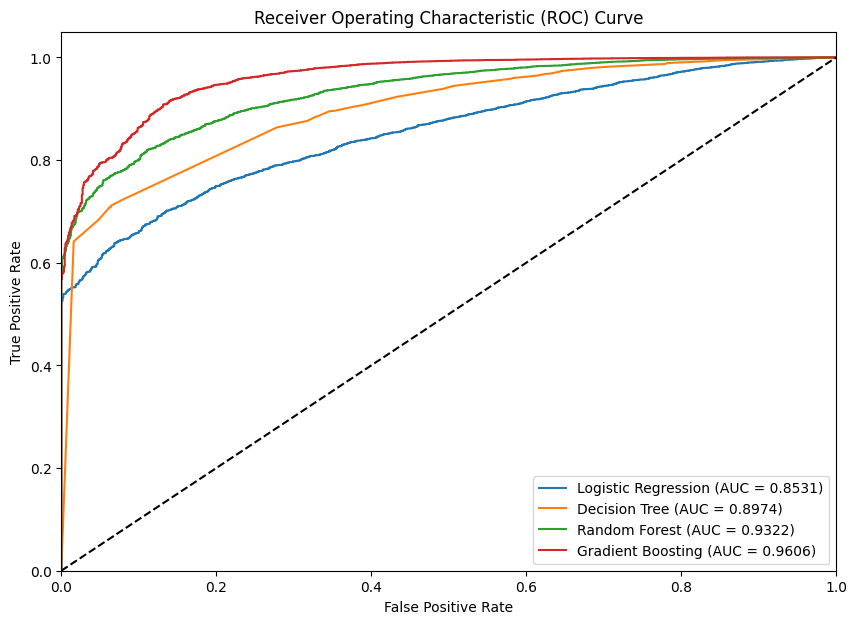

In [12]:
# Plot ROC-AUC curves for each model
trainer.plot_roc_curves()

### Step 12: **Save and Reuse the Best Models**
Save the best models for later use:

In [ ]:
trainer.save_best_models(save_dir='../models')